           Gene         Transcript ID  \
0          AAMP     ENST00000248450.9   
1          AAR2     ENST00000320849.9   
2      AASDHPPT     ENST00000278618.9   
19   AC073610.2     ENST00000256682.9   
29        ACAT1     ENST00000265838.9   
..          ...                   ...   
608       WDR77  ENST00000235090.10-1   
611        YBX1    ENST00000321358.12   
612        YBX3   ENST00000228251.9-1   
613       YWHAQ     ENST00000238081.8   
614         YY1    ENST00000262238.10   

                                        P_location P_Splice_Distance  \
0                                  ['3 prime UTR']             [123]   
1                                  ['3 prime UTR']             [130]   
2                                          ['CDS']               [8]   
19                                 ['3 prime UTR']             [696]   
29                                         ['CDS']              [25]   
..                                             ...               ...   
608

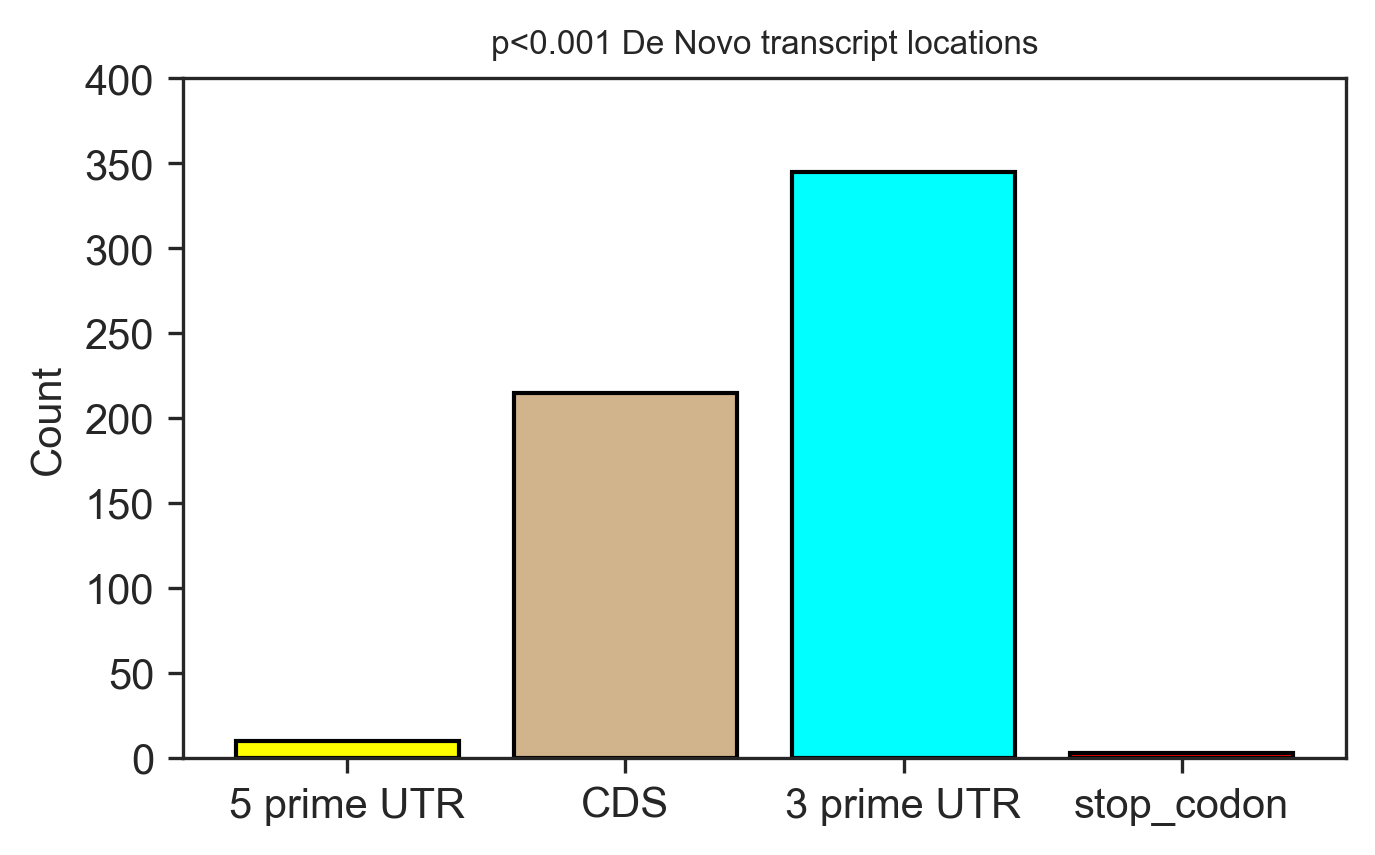

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#data = pd.read_csv("Dom_isoforms_350.csv")
#data = pd.read_csv("Dominant_v36_type1.csv")
#data = pd.read_csv("Final_1_dominant_isoform_combined.csv")

#data = pd.read_csv("Dominant_Complete_Analysis.csv")
#data = pd.read_csv("Dominant_isoforms_0.001cutoff.csv")

#data = pd.read_csv("p_value_0.001_isoforms.csv")
data = pd.read_csv("dominant_isoform_combined_final.csv")
data = pd.read_csv("dominant_isoform_combined_final_v2.csv")



###Pie Chart of De Novo transcript locations###
Targets = data[data["Transcript ID"].str.contains("ENST")==True]
#print(">>>>>: " + str(len(locations)))
print(Targets)

location_dict = {"3 prime UTR":0,"5 prime UTR":0,"CDS":0, "start_codon":0, "stop_codon":0}
print(location_dict.keys())
# my_dict["Nam"].append("Guru")
# my_dict["Address"].append("Mumbai")
# my_dict["Age"].append(30
# print(my_dict)
target_Location = [loc.replace('"', '') for loc in Targets["P_location"]]
#print(target_Location)
for loc in target_Location:
    t = loc.split(",")
    #print(loc)
    for i in t:
        i = i.replace("'", '')
        i = i.replace('[', '').replace(']', '')
        i = i.strip()
        if i != str(0) and i != '':
            location_dict[i]+=1    
print(location_dict)

labels = []
count = []

desired_order_list = ['5 prime UTR', 'CDS', '3 prime UTR', 'stop_codon']

reordered_dict = {k: location_dict[k] for k in desired_order_list}

for x, y in reordered_dict.items():
    if y != 0:
        labels.append(x)
        count.append(y)

####Bar Plot###
plt.figure(figsize=(5, 3),dpi=300)
#autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f}
#plt.pie(count, labels=labels, colors = ['cyan','yellow','tan', 'green', 'red'], autopct=lambda p:f'{p*sum(count)/100 :.0f} targets', textprops={'fontsize': 5})#,explode = (0.03,0.03,0.03,1,1), radius=1.2)
plt.bar(labels, count, color = ['yellow','tan','cyan', 'red'], edgecolor = "black")
plt.ylabel("Count")
plt.ylim(0, 400)
plt.title("p<0.001 De Novo transcript locations", fontdict = {'fontsize' : 8})
save_results_to = 'Updated_Figures/'
# plt.savefig(save_results_to + 'Barplot_Total_De_Novo_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Barplot_Total_De_Novo_0.001.svg', transparent=True, dpi = 300)
#############################################################################        

###Analysis of distance from splice junctions###
CDS = []
UTR5 = []
UTR3 = []
for location, splice, length in zip(target_Location,Targets["P_Splice_Distance"], Targets["Length of CDS/UTR"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    splice = splice.replace('[', '').replace(']', '').split(",")
    length = length.replace('[', '').replace(']', '').split(",")
    #print(location, splice, length)
    for loc, spd, le in zip(location, splice, length):
        loc = loc.strip()
        if loc != str(0) and loc != '' and le != ' 0':
            #print(le)
            #print(spd)
            length_percent = round(int(spd)/int(le), 4)
            #print(loc, length_percent)
            if loc == 'CDS':
                CDS.append(length_percent)
            elif loc == '5 prime UTR':
                UTR5.append(length_percent)
            elif loc == '3 prime UTR':
                UTR3.append(length_percent)
                
print("CDS mean: " + str(np.mean(CDS))) 
print("5 prime utr mean: " + str(np.mean(UTR5))) 
print("3 prime utr mean: " + str(np.mean(UTR3)))
print("CDS std: " + str(np.std(CDS))) 
print("5 prime utr std: " + str(np.std(UTR5))) 
print("3 prime utr std: " + str(np.std(UTR3)))
    
###Detecting start and stop codon targets###
for location, g in zip(target_Location, Targets["Gene"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    for i, loc in enumerate(location):
        loc = loc.strip()
        if loc == 'start_codon' or loc == 'stop_codon':
            print(i,g,loc)
        
# #data.plot.pie(y="P1_location", figsize=(5, 5))
# p1 = data['P1_location'].value_counts()
# p2 = data['P2_location'].value_counts()

# #print(p1)
# #print(p2)

# UTR_data_P1=data.loc[data['P1_location']=="UTR"]
# UTRP1_M = UTR_data_P1['P1_Splice_Distance'].mean()
# UTRP1_Total = UTR_data_P1['P1_Splice_Distance'].values
# UTRP1_Count = UTR_data_P1['P1_Splice_Distance'].count()
# print(UTRP1_Count)


# CDS_data_P1=data.loc[data['P1_location']=="CDS"]
# CDSP1_M = CDS_data_P1['P1_Splice_Distance'].mean()
# CDSP1_Total = CDS_data_P1['P1_Splice_Distance'].values
# CDSP1_Count = CDS_data_P1['P1_Splice_Distance'].count()

# UTR_data_P2=data.loc[data['P2_location']=="UTR"]
# UTRP2_M = UTR_data_P2['P2_Splice_Distance'].mean()
# UTRP2_Total = UTR_data_P2['P2_Splice_Distance'].values
# UTRP2_Count = UTR_data_P2['P2_Splice_Distance'].count()

# CDS_data_P2=data.loc[data['P2_location']=="CDS"]
# CDSP2_M = CDS_data_P2['P2_Splice_Distance'].mean()
# CDSP2_Total = CDS_data_P2['P2_Splice_Distance'].values
# CDSP2_Count = CDS_data_P2['P2_Splice_Distance'].count()

# # save_results_to = 'Updated_Figures/'      
# ####Pie Charts###
# plt.figure(figsize=(5, 3),dpi=300)
# values1 = [UTRP1_Count, CDSP1_Count] 
# labels = ['UTR', 'CDS']
# #autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f}
# plt.pie(values1, labels=labels, autopct=lambda p:f'{p*sum(values1)/100 :.0f} genes')
# plt.title("Position 1 transcript locations")
# #plt.savefig(save_results_to + 'Pie_Pos_1.png', dpi = 300)

# plt.figure(figsize=(5, 3),dpi=300)
# values2 = [UTRP2_Count, CDSP2_Count] 
# labels = ['UTR', 'CDS']
# #autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f}
# plt.pie(values2, labels=labels, autopct=lambda p:f'{p*sum(values2)/100 :.0f} genes')
# plt.title("Position 2 transcript locations")
# #plt.savefig(save_results_to + 'Pie_Pos_2.png', dpi = 300)

# # P1_Counts = data.groupby("P1_location").size()
# # sns.set()
# # P1_Counts.plot(kind='pie', title='mRNA transcript location in De Novo Psi sites on position 1', figsize=[8,8],
# #           autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*days.sum()))

# ###################

# ###Barplot of average distance####
# y = [UTRP1_M, CDSP1_M, UTRP2_M, CDSP2_M]
# x = ["P1_UTR", "P1_CDS", "P2_UTR", "P2_CDS"]

# plt.figure(figsize=(5, 3),dpi=300)
# plt.bar(x, y, color ='black', width = 0.4)
# plt.xlabel("Transcript Location")
# plt.ylabel("Location from splice junction (bp)")
# plt.title("Average Distance from splice junction vs mRNA location")
# #plt.savefig(save_results_to + 'Avg_Distance_Bar.png', dpi = 300)

# # plt.figure(figsize=(5, 3),dpi=300)
# # plt.hist(UTRP1_Total, density=False, bins=30) 
# # plt.hist(CDSP1_Total, density=False, bins=10)  
# # plt.ylabel('Probability')
# # plt.xlabel('Distance from Splice Junction (bp)')
# #################

# ###Histogram of distance from splice junctions####
# import seaborn as sns
# sns.set_style(style='white')
# plt.figure(figsize=(5, 3),dpi=300)
# sns.distplot(UTRP1_Total, rug=False, hist = True, kde = False, 
#                  hist_kws = {'edgecolor': 'black'},  
#                  kde_kws = {'shade': True, 'linewidth': 3}, label = 'Position 1 UTR sites')
# sns.distplot(CDSP1_Total, rug=False, hist = True, kde = False, 
#                  hist_kws = {'edgecolor': 'black'},
#                  kde_kws = {'shade': True, 'linewidth': 3}, label = 'Position 1 CDS sites')
# plt.legend()
# plt.xlabel("Distance from splice junction (bp)")
# plt.ylabel("Count")
# plt.title("Distance from splice junction in Position 1 sites")
# #plt.savefig(save_results_to + 'Distance_hist_Pos1.png', dpi = 300)

# plt.figure(figsize=(5, 3),dpi=300)
# sns.distplot(UTRP2_Total, rug=False, hist = True, kde = False, 
#                  hist_kws = {'edgecolor': 'black'},  
#                  kde_kws = {'shade': True, 'linewidth': 3}, label = 'Position 2 UTR sites')
# sns.distplot(CDSP2_Total, rug=False, hist = True, kde = False, 
#                  hist_kws = {'edgecolor': 'black'},
#                  kde_kws = {'shade': True, 'linewidth': 3}, label = 'Position 2 UTR sites')
# plt.legend()
# plt.xlabel("Distance from splice junction (bp)")
# plt.ylabel("Count")
# plt.title("Distance from splice junction in Position 2 sites")
# #plt.savefig(save_results_to + 'Distance_hist_Pos2.png', dpi = 300)

# plt.figure(figsize=(5, 3),dpi=300)
# data = [UTRP1_Total, CDSP1_Total, UTRP2_Total, CDSP2_Total]
# plt.boxplot(data)

In [98]:
###Make a dictionary with all possible kmers 5nt###
#################
# fruits = ["Apple", "Pear", "Peach", "Banana"]
# fruit_dictionary = { fruit : "In stock" for fruit in fruits }
# print(fruit_dictionary)
################

from itertools import product
kmers = [''.join(c) for c in product('ATGC', repeat=5)]
print(len(kmers))
kmers = dict.fromkeys(kmers, 0)
#print(kmers)

for location, splice, k in zip(target_Location,Targets["P_Splice_Distance"], Targets["Kmer"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    splice = splice.replace('[', '').replace(']', '').split(",")
    k = k.replace("'", '').replace('[', '').replace(']', '').split(',')
    #print(location, splice, length)
    for loc, spd, K in zip(location, splice, k):
        K = K.strip()
        loc = loc.strip()
        if loc != str(0) and loc != '' and loc == '3 prime UTR':
            kmers[K]+=1    
kmer_hits = {k:v for (k,v) in kmers.items() if v > 0}
kmer_hits_ordered = {k: v for k, v in sorted(kmer_hits.items(), key=lambda item: item[1], reverse=True)}

print(sum(kmer_hits_ordered.values()))
print(kmer_hits_ordered)

1024
342
{'TTTTT': 27, 'TTTTA': 19, 'GATTT': 17, 'TGTAG': 12, 'CTTTT': 11, 'CTTTG': 11, 'CTTTC': 10, 'TTTTC': 9, 'GATTG': 9, 'ACTTA': 8, 'GTTCC': 7, 'CTTTA': 7, 'ACTTC': 6, 'TTTAA': 6, 'TTTTG': 6, 'GTTTT': 6, 'TTTAC': 5, 'GATTC': 5, 'ACTTG': 4, 'TCTAG': 4, 'GTTAA': 4, 'GTTCT': 4, 'ATTTT': 3, 'ATTTG': 3, 'ATTTC': 3, 'TTTAT': 3, 'TGTTC': 3, 'GTTAT': 3, 'GTTAG': 3, 'GTTTG': 3, 'GTTGC': 3, 'CTTAA': 3, 'CTTAC': 3, 'CTTCA': 3, 'CGTTG': 3, 'AATAA': 2, 'AATGA': 2, 'ACTCA': 2, 'TATAA': 2, 'TATTA': 2, 'TATTT': 2, 'TGTAA': 2, 'TGTGT': 2, 'TGTGC': 2, 'TCTTT': 2, 'TCTTG': 2, 'GATGT': 2, 'GTTAC': 2, 'GTTGA': 2, 'GTTCA': 2, 'GCTTG': 2, 'GCTGT': 2, 'GCTGG': 2, 'CATAA': 2, 'CATTG': 2, 'CATTC': 2, 'CATGA': 2, 'CTTCT': 2, 'CGTTA': 2, 'CGTCA': 2, 'AATTT': 1, 'AATTG': 1, 'ATTAA': 1, 'ATTAG': 1, 'ATTAC': 1, 'ATTTA': 1, 'ATTCT': 1, 'AGTCC': 1, 'ACTTT': 1, 'ACTGT': 1, 'ACTCT': 1, 'TATAG': 1, 'TATTG': 1, 'TATTC': 1, 'TTTAG': 1, 'TTTGT': 1, 'TTTGG': 1, 'TTTCT': 1, 'TTTCG': 1, 'TGTAT': 1, 'TGTGG': 1, 'TCTAA': 1,

>>>>>: 467
215
10
344
(0.4217532443537993, 2.8721029647594833e-16)
(0.7288081438392087, 6.868451003013553e-37)


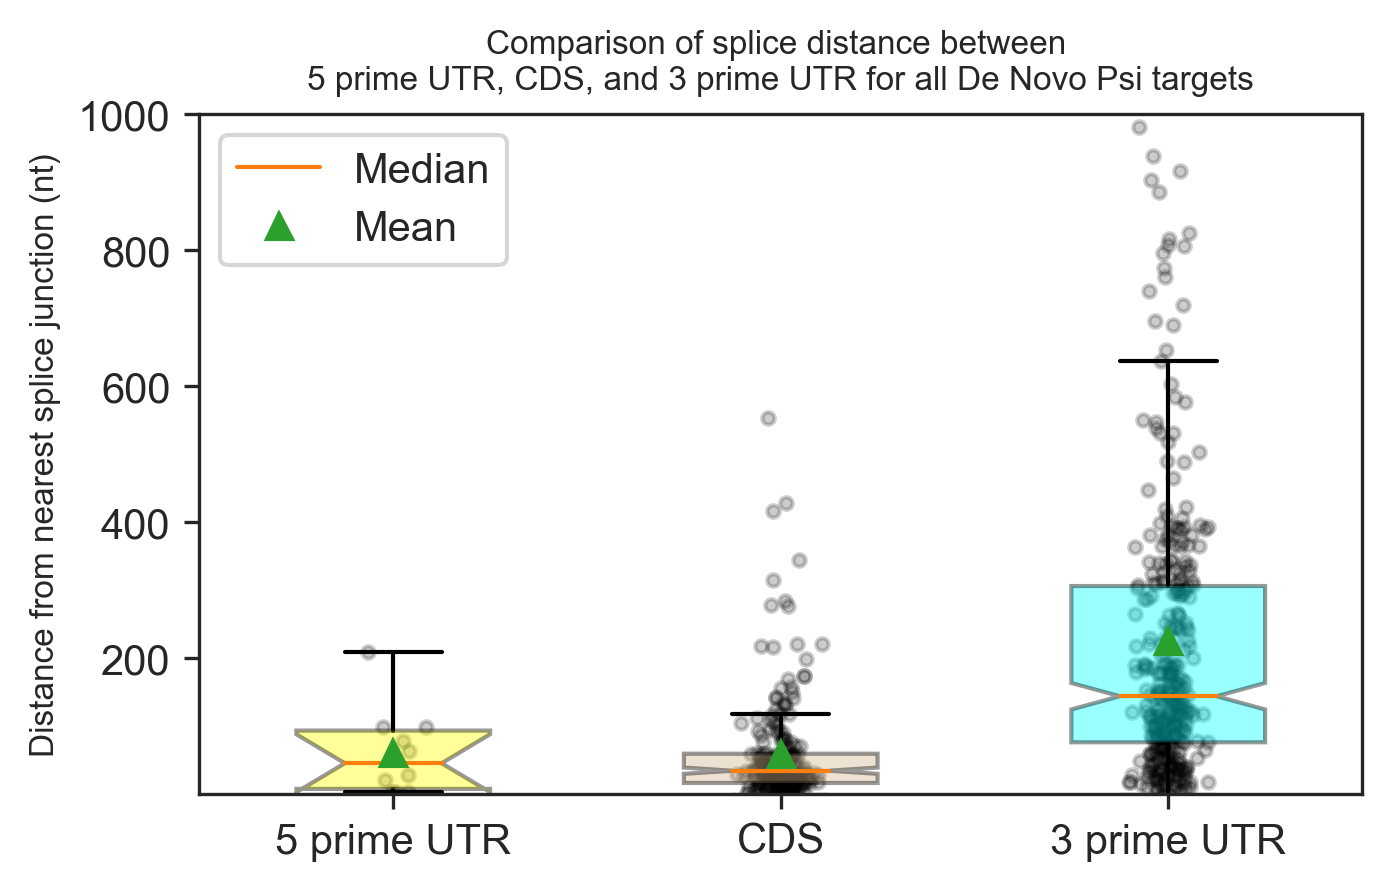

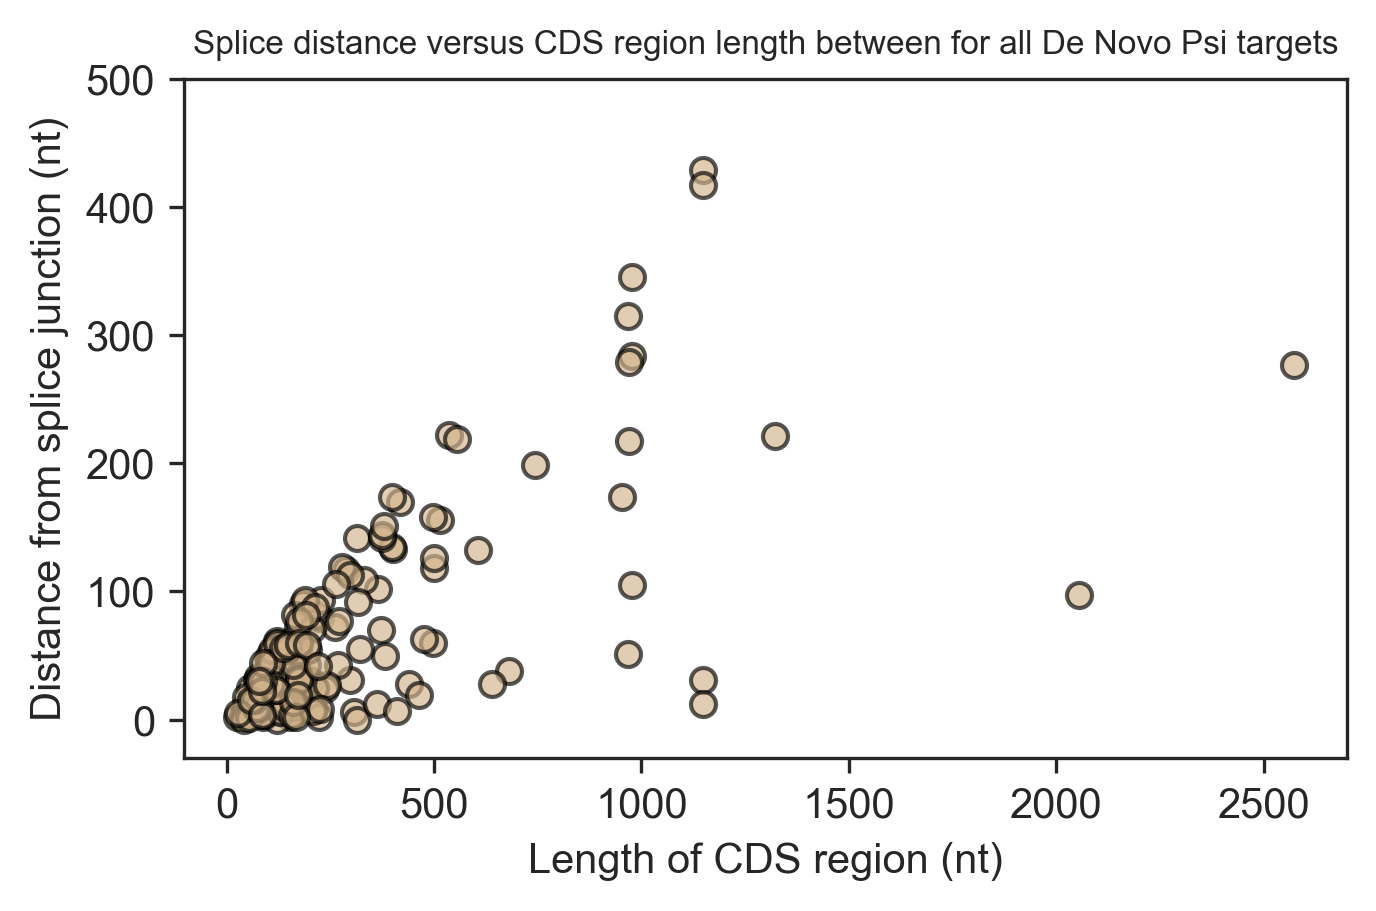

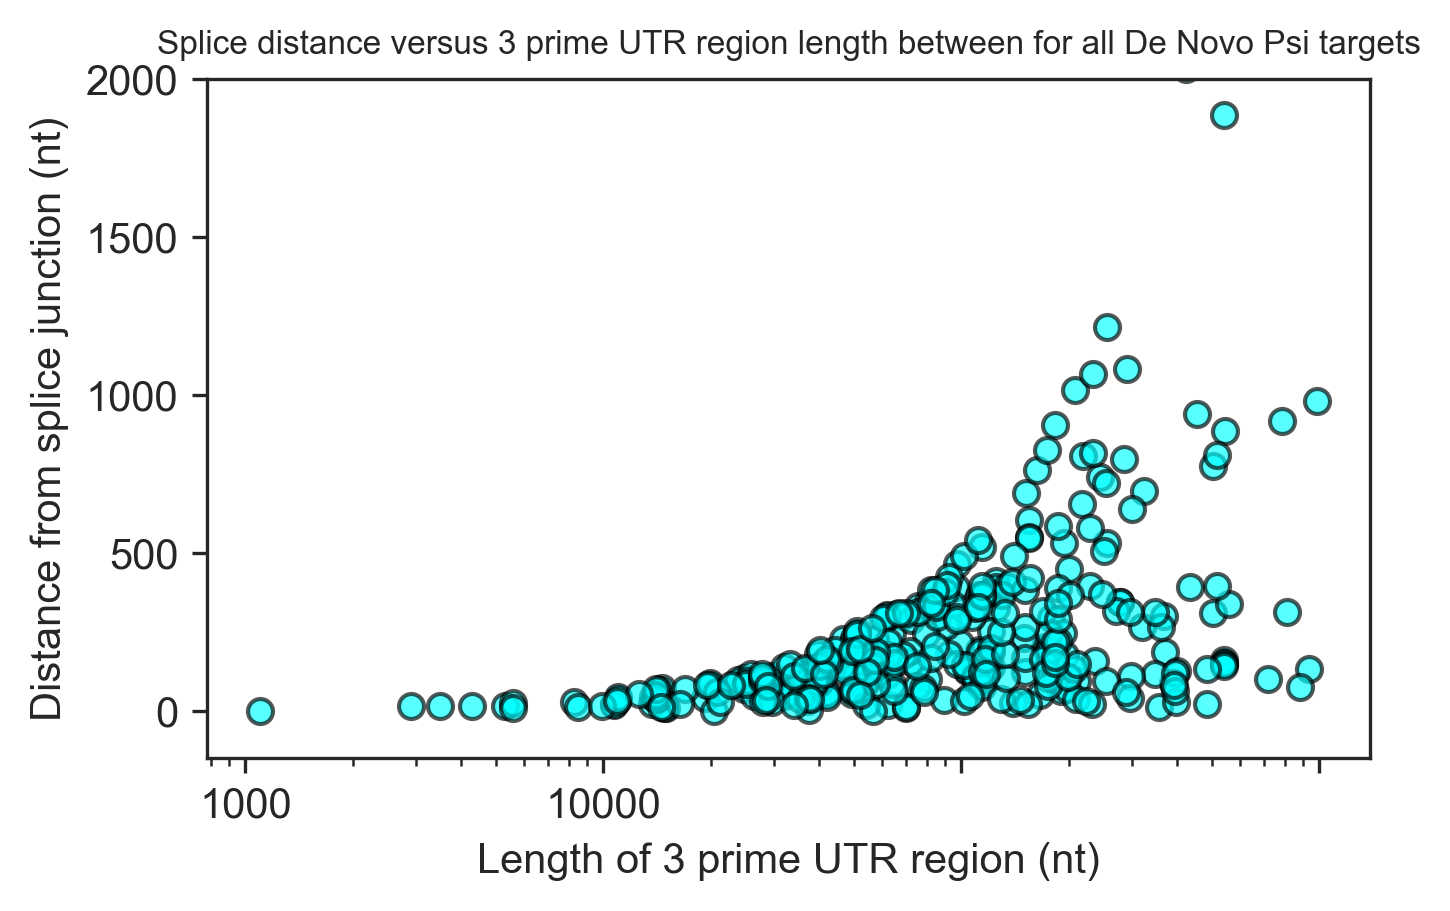

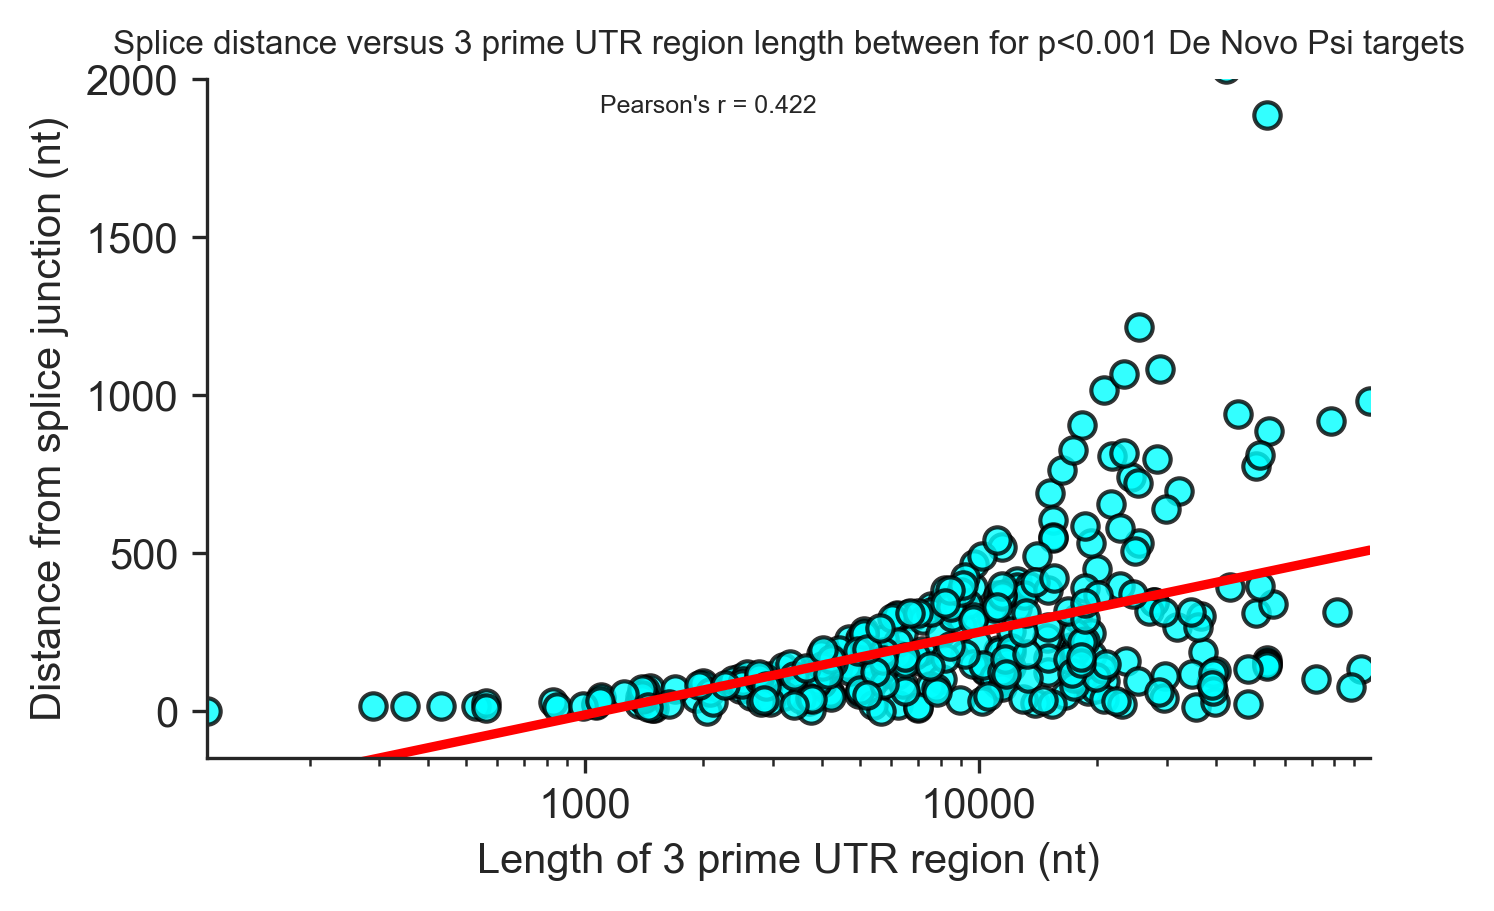

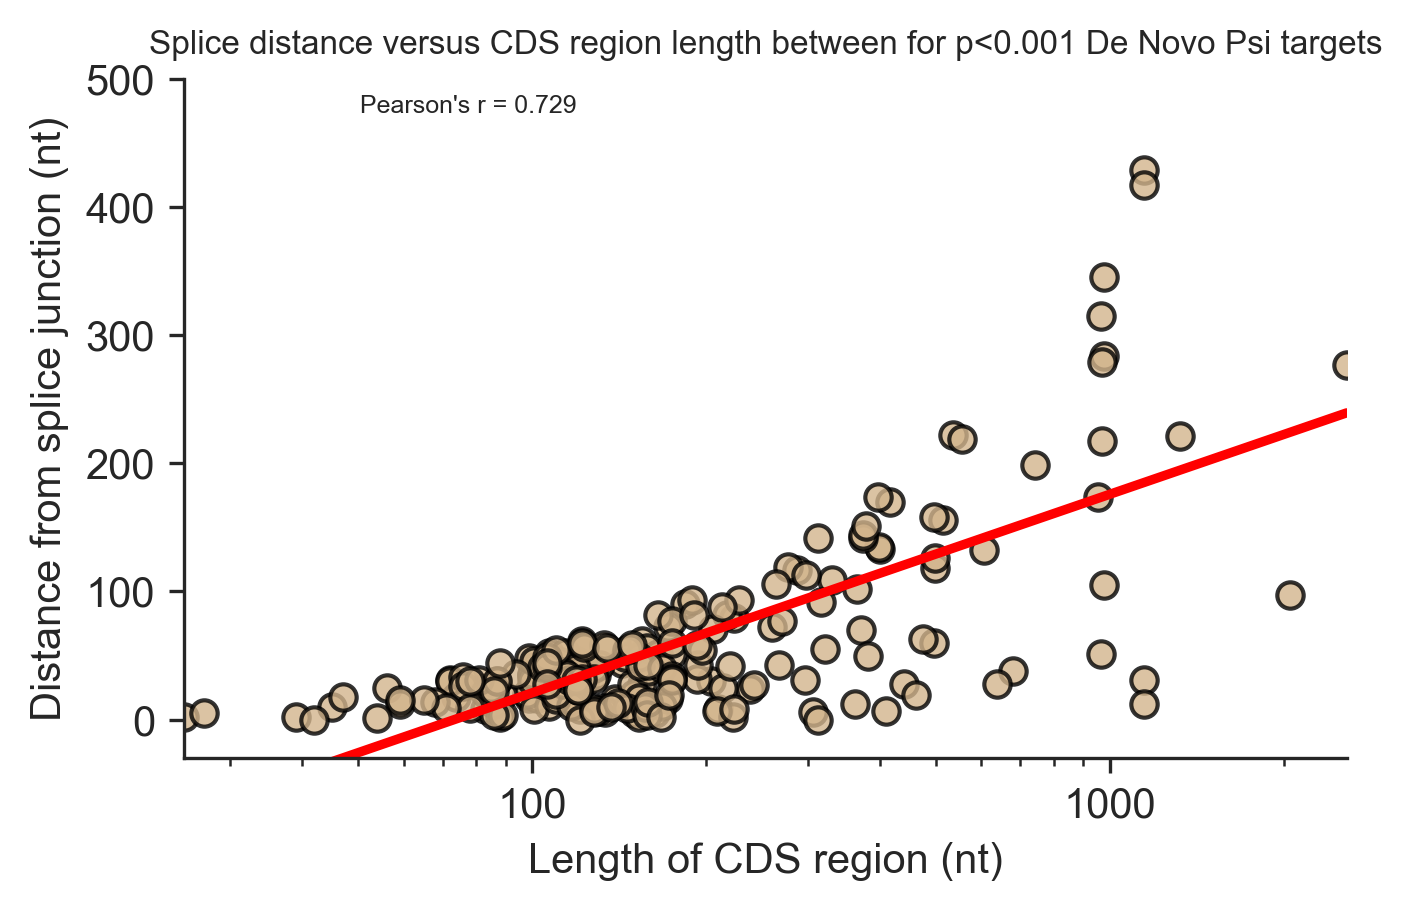

In [99]:
###All Mods De Novo analysis of distance from splice junctions###
#data = pd.read_csv("Dominant_Complete_Analysis.csv")
#Targets = data[data["Transcript ID"].str.contains("ENST")==True]
print(">>>>>: " + str(len(Targets)))
#print(Targets)

target_Location = [loc.replace('"', '') for loc in Targets["P_location"]]

CDS_splice_d = []
UTR5_splice_d = []
UTR3_splice_d = []

CDS_length = []
UTR5_length = []
UTR3_length = []

for location, splice_distance, region_length in zip(target_Location,Targets["P_Splice_Distance"], Targets["Length of CDS/UTR"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    splice_distance = splice_distance.replace('[', '').replace(']', '').split(",")
    region_length = region_length.replace('[', '').replace(']', '').split(",")
    for loc, spd, rl in zip(location, splice_distance, region_length):
        loc = loc.strip()
        if loc != str(0) and loc != '' and rl != ' 0':
            #length_percent = round(int(spd)/int(le), 4)
            #print(loc, length_percent)
            if loc == 'CDS':
                CDS_splice_d.append(int(spd))
                CDS_length.append(int(rl))
            elif loc == '5 prime UTR':
                UTR5_splice_d.append(int(spd))
                UTR5_length.append(int(rl))
            elif loc == '3 prime UTR':
                UTR3_splice_d.append(int(spd))
                UTR3_length.append(int(rl))
print(len(CDS_splice_d))
print(len(UTR5_splice_d))
print(len(UTR3_splice_d))

plt.figure(figsize=(5, 3),dpi=300)

data = [UTR5_splice_d, CDS_splice_d, UTR3_splice_d]#, UTRP2_Total, CDSP2_Total]
box = plt.boxplot(data, notch='False', patch_artist=True, showmeans=True, showfliers=False, widths=(0.5, 0.5, 0.5))
plt.xticks([1, 2, 3], ['5 prime UTR', 'CDS', '3 prime UTR'])
for i in [1,2,3]:
    y = data[i-1]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.2)
plt.ylabel("Distance from nearest splice junction (nt)", fontdict = {'fontsize' : 8})
plt.legend([box['medians'][0], box['means'][0]], ['Median', 'Mean'], loc = 'upper left')
#plt.yscale("log")
plt.ylim(1, 1000)
colors = ['yellow', 'tan', 'cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)
plt.title("Comparison of splice distance between \n5 prime UTR, CDS, and 3 prime UTR for all De Novo Psi targets", fontdict = {'fontsize' : 8})
# plt.savefig(save_results_to + 'Boxplot_Total_De_Novo_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Boxplot_Total_De_Novo_0.001.svg', transparent=True, dpi = 300)

###Scatter for splice distance vs length of region###
x = CDS_length
y = CDS_splice_d
fig = plt.figure(figsize=(5, 3),dpi=300)
ax = plt.gca()
ax.scatter(x, y, c='tan', alpha=0.66, edgecolors='k')
ax.set_ylim(-30, 500)
#ax.set_xscale('log')
#xlabels = ['100','1000','100','1000']
#ax.set_xticklabels(xlabels)
plt.xlabel("Length of CDS region (nt)")
plt.ylabel("Distance from splice junction (nt)")
plt.title("Splice distance versus CDS region length between for all De Novo Psi targets", fontdict = {'fontsize' : 8})
# plt.savefig(save_results_to + 'Scatter_CDS_Total_De_Novo_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Scatter_CDS_Total_De_Novo_0.001.svg', transparent=True, dpi = 300)

x = UTR3_length
y = UTR3_splice_d
fig = plt.figure(figsize=(5, 3),dpi=300)
ax = plt.gca()
ax.scatter(x, y, c='cyan', alpha=0.66, edgecolors='k')
#ax.set_xlim(1, 10)
ax.set_ylim(-150, 2000)
plt.xlabel("Length of 3 prime UTR region (nt)")
plt.ylabel("Distance from splice junction (nt)")
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
#p = np.polyfit(np.log(x), y, 1)
#ax.semilogx(x, p[0] * np.log(x) + p[1], 'r-')
ax.set_xscale('log')
xlabels = ['100','1000', '1000','10000']
ax.set_xticklabels(xlabels)
plt.title("Splice distance versus 3 prime UTR region length between for all De Novo Psi targets", fontdict = {'fontsize' : 8})
# plt.savefig(save_results_to + 'Scatter_3UTR_Total_De_Novo_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Scatter_3UTR_Total_De_Novo_0.001.svg', transparent=True, dpi = 300)


############################################################
from scipy import stats
C_UTR3 = stats.pearsonr(UTR3_length, UTR3_splice_d)
C_CDS = stats.pearsonr(CDS_length, CDS_splice_d)
print(C_UTR3)
print(C_CDS)

############################################################

import seaborn as sns
f, ax = plt.subplots(figsize=(5, 3),dpi=300)
#fig = plt.figure(figsize=(5, 3),dpi=300)
sns.set_style('ticks')
ax.set(xscale="log")
ax.set_ylim(-150,2000)
splot = sns.regplot(x, y, color='cyan', ax=ax, logx=True, 
                    line_kws={'color': 'red'}, 
                    scatter_kws={"edgecolors":'k', "s":40}, ci = None)
splot.set(xscale="log")
xlabels = ['100','1000','1000','10000', '1000','10000']
ax.set_xticklabels(xlabels)
plt.xlabel("Length of 3 prime UTR region (nt)")
plt.ylabel("Distance from splice junction (nt)")
plt.title("Splice distance versus 3 prime UTR region length between for p<0.001 De Novo Psi targets", fontdict = {'fontsize' : 8})
tl = ((ax.get_xlim()[1] - ax.get_xlim()[0])*0.010 + ax.get_xlim()[0],
      (ax.get_ylim()[1] - ax.get_ylim()[0])*0.95 + ax.get_ylim()[0])
ax.text(tl[0], tl[1], r"Pearson's r = {}".format(round(C_UTR3[0], 3)), fontdict = {'fontsize' : 6})
sns.despine(offset=0)
# plt.savefig(save_results_to + 'Scatter_3UTR_Total_De_Novo_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Scatter_3UTR_Total_De_Novo_0.001.svg', transparent=True, dpi = 300)


x = CDS_length
y = CDS_splice_d
f, ax = plt.subplots(figsize=(5, 3),dpi=300)
#fig = plt.figure(figsize=(5, 3),dpi=300)
sns.set_style('ticks')
ax.set(xscale="log")
ax.set_ylim(-30, 500)
splot = sns.regplot(x, y, color='tan', ax=ax, logx=True, 
                    line_kws={'color': 'red'}, 
                    scatter_kws={"edgecolors":'k', "s":40}, ci = None)
splot.set(xscale="log")
xlabels = ['100','1000','100','1000']
ax.set_xticklabels(xlabels)
plt.xlabel("Length of CDS region (nt)")
plt.ylabel("Distance from splice junction (nt)")
plt.title("Splice distance versus CDS region length between for p<0.001 De Novo Psi targets", fontdict = {'fontsize' : 8})
tl = ((ax.get_xlim()[1] - ax.get_xlim()[0])*0.010 + ax.get_xlim()[0],
      (ax.get_ylim()[1] - ax.get_ylim()[0])*0.95 + ax.get_ylim()[0])
ax.text(tl[0], tl[1], r"Pearson's r = {}".format(round(C_CDS[0], 3)), fontdict = {'fontsize' : 6})
sns.despine(offset=0)
# plt.savefig(save_results_to + 'Scatter_CDS_Total_De_Novo_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Scatter_CDS_Total_De_Novo_0.001.svg', transparent=True, dpi = 300)

dict_keys(['3 prime UTR', '5 prime UTR', 'CDS', 'start_codon', 'stop_codon'])
{'3 prime UTR': 46, '5 prime UTR': 2, 'CDS': 23, 'start_codon': 0, 'stop_codon': 0}


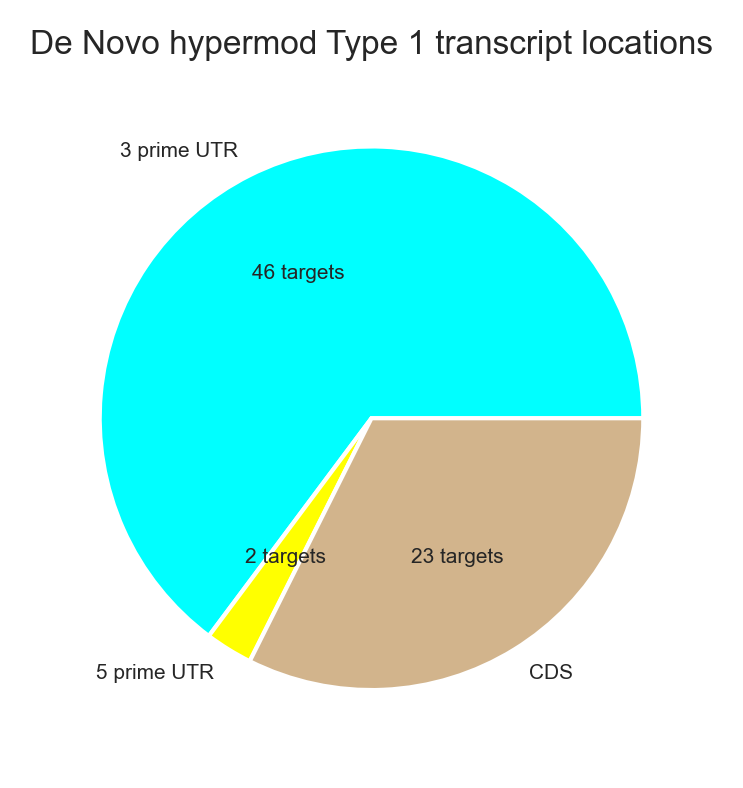

In [119]:
###Pie Chart of De Novo Type 1 transcript locations###

#print(">>>>>: " + str(len(locations)))
#print(Targets)

location_dict = {"3 prime UTR":0,"5 prime UTR":0,"CDS":0, "start_codon":0, "stop_codon":0}
print(location_dict.keys())
# my_dict["Nam"].append("Guru")
# my_dict["Address"].append("Mumbai")
# my_dict["Age"].append(30
# print(my_dict)
target_Location = [loc.replace('"', '') for loc in Targets["P_location"]]
#print(target_Location)
for location, perc_diff in zip(target_Location, Targets["Percent_Diff"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    perc_diff = perc_diff.replace('[', '').replace(']', '').split(",")
    for loc, pd in zip(location, perc_diff):
        loc = loc.strip()
        if loc != str(0) and loc != '' and float(pd) > 40:
            location_dict[loc]+=1    
print(location_dict)

labels = []
count = []

for x, y in location_dict.items():
    if y != 0:
        labels.append(x)
        count.append(y)

####Pie Charts###
plt.figure(figsize=(5, 3),dpi=300)
#autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f}
plt.pie(count, labels=labels, colors = ['cyan','yellow','tan'], autopct=lambda p:f'{p*sum(count)/100 :.0f} targets', textprops={'fontsize': 5})
plt.title("De Novo hypermod Type 1 transcript locations", fontdict = {'fontsize' : 8})
# plt.savefig(save_results_to + 'Pie_hypermod_type1_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Pie_hypermod_type1_0.001.svg', transparent=True, dpi = 300)

23
2
46
192
8
294
0.16661466697826519
23


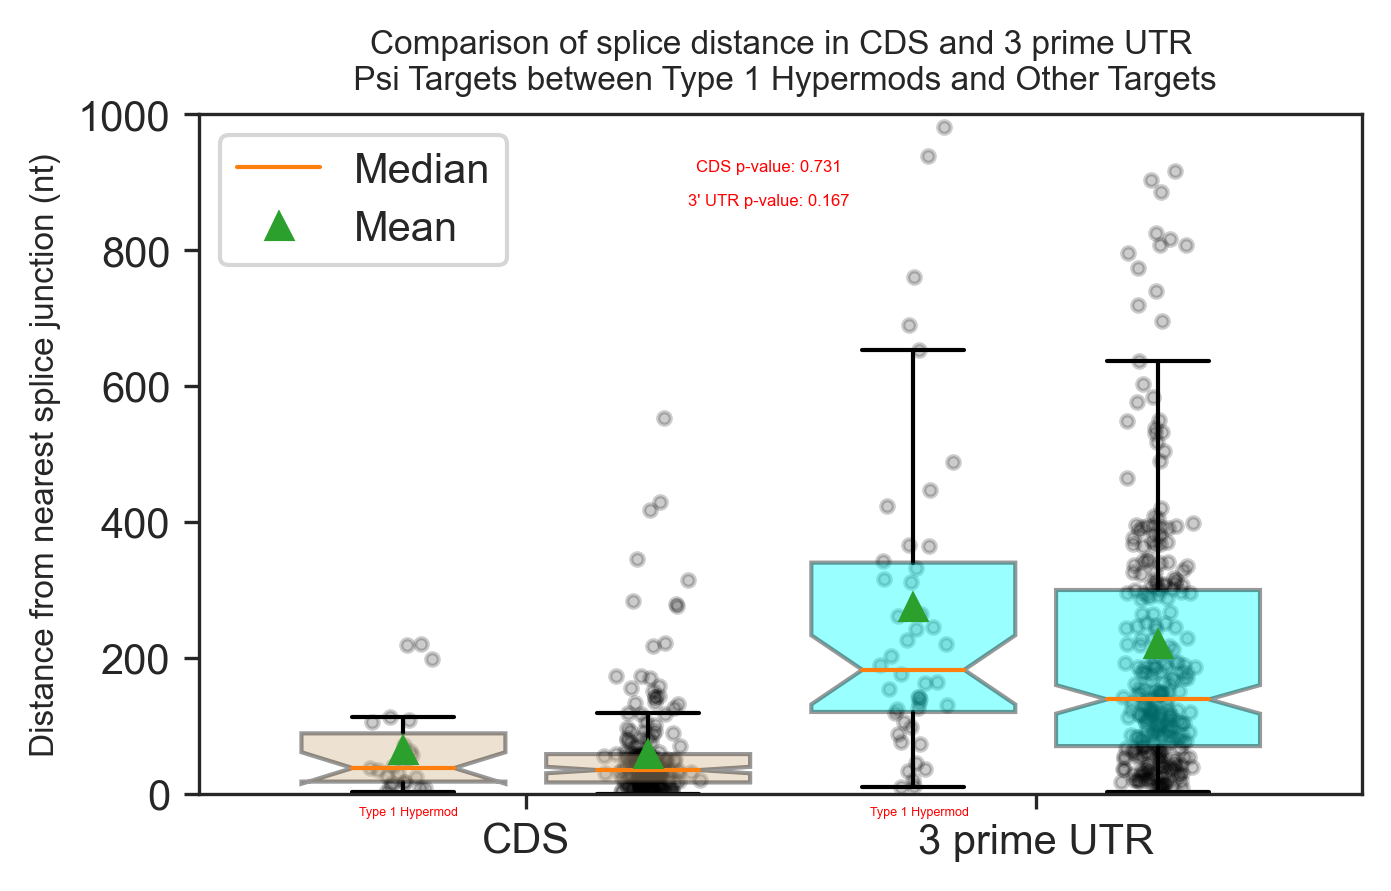

In [118]:
###Type1 Mods De Novo analysis of distance from splice junctions###
#data = pd.read_csv("Dominant_Complete_Analysis.csv")
#Targets = data[data["Transcript ID"].str.contains("ENST")==True]
#print(">>>>>: " + str(len(Targets)))
#print(Targets)



target_Location = [loc.replace('"', '') for loc in Targets["P_location"]]
CDS_splice_d_type_1 = []
UTR5_splice_d_type_1 = []
UTR3_splice_d_type_1 = []
CDS_splice_d_rest = []
UTR5_splice_d_rest = []
UTR3_splice_d_rest = []
for location, splice_distance, perc_diff in zip(target_Location,Targets["P_Splice_Distance"], Targets["Percent_Diff"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    splice_distance = splice_distance.replace('[', '').replace(']', '').split(",")
    perc_diff = perc_diff.replace('[', '').replace(']', '').split(",")
    for loc, spd, pd in zip(location, splice_distance, perc_diff):
        loc = loc.strip()
        if loc != str(0) and loc != '' and float(pd) > 40:
            #length_percent = round(int(spd)/int(le), 4)
            #print(loc, length_percent)
            if loc == 'CDS':
                CDS_splice_d_type_1.append(int(spd))
            elif loc == '5 prime UTR':
                UTR5_splice_d_type_1.append(int(spd))
            elif loc == '3 prime UTR':
                UTR3_splice_d_type_1.append(int(spd))
        elif loc != str(0) and loc != '' and float(pd) < 40:
            if loc == 'CDS':
                CDS_splice_d_rest.append(int(spd))
            elif loc == '5 prime UTR':
                UTR5_splice_d_rest.append(int(spd))
            elif loc == '3 prime UTR':
                UTR3_splice_d_rest.append(int(spd))
print(len(CDS_splice_d_type_1))
print(len(UTR5_splice_d_type_1))
print(len(UTR3_splice_d_type_1))

print(len(CDS_splice_d_rest))
print(len(UTR5_splice_d_rest))
print(len(UTR3_splice_d_rest))


plt.figure(figsize=(5, 3),dpi=300)

data_1 = [CDS_splice_d_type_1, UTR3_splice_d_type_1]#, UTR5_splice_d]#, UTRP2_Total, CDSP2_Total]
data_2 = [CDS_splice_d_rest, UTR3_splice_d_rest]#, UTR5_splice_d]#, UTRP2_Total, CDSP2_Total]
box_1 = plt.boxplot(data_1, positions=[0.2,1.45], notch='False', patch_artist=True, showmeans=True, showfliers=False, widths=(0.5, 0.5))
box_2 = plt.boxplot(data_2, positions=[0.8,2.05], notch='False', patch_artist=True, showmeans=True, showfliers=False, widths=(0.5, 0.5))
plt.xticks([0.5,1.75], ['CDS', '3 prime UTR'])
for i, j in zip([1,2], [0.5,1.75]):#,3]:
    y = data_1[i-1]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(j-0.3, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.2)
for i, j in zip([1,2], [0.5,1.75]):
    y = data_2[i-1]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(j+0.3, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.2)
plt.ylabel("Distance from nearest splice junction (nt)", fontdict = {'fontsize' : 8})
plt.legend([box_1['medians'][0], box_1['means'][0]], ['Median', 'Mean'], loc = 'upper left')
#plt.yscale("log")
plt.ylim(0, 1000)
colors = ['tan', 'cyan']
for patch, color in zip(box_1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)
for patch, color in zip(box_2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)
    
plt.text(0.19,-0.05,'Type 1 Hypermod',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=3, color='r')
plt.text(0.63,-0.05,'Type 1 Hypermod',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=3, color='r')
plt.title("Comparison of splice distance in CDS and 3 prime UTR\n Psi Targets between Type 1 Hypermods and Other Targets", fontdict = {'fontsize' : 8})
from scipy import stats
f_value_1, p_value_1 = stats.f_oneway(data_1[0], data_2[0])
f_value_2, p_value_2 = stats.f_oneway(data_1[1], data_2[1])
print(p_value)

p_value_1 = round(p_value_1, 3)
p_value_2 = round(p_value_2, 3)
plt.text(0.5,0.85,f"3' UTR p-value: {p_value_2}",horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=4, color='r')
plt.text(0.5,0.9,f"CDS p-value: {p_value_1}",horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes, fontsize=4, color='r')
print(len(data_1[0]))

# plt.savefig(save_results_to + 'Boxplot_hypermod_type1_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Boxplot_hypermod_type1_0.001.svg', transparent=True, dpi = 300)


dict_keys(['3 prime UTR', '5 prime UTR', 'CDS', 'start_codon', 'stop_codon'])
{'3 prime UTR': 143, '5 prime UTR': 4, 'CDS': 82, 'start_codon': 0, 'stop_codon': 3}


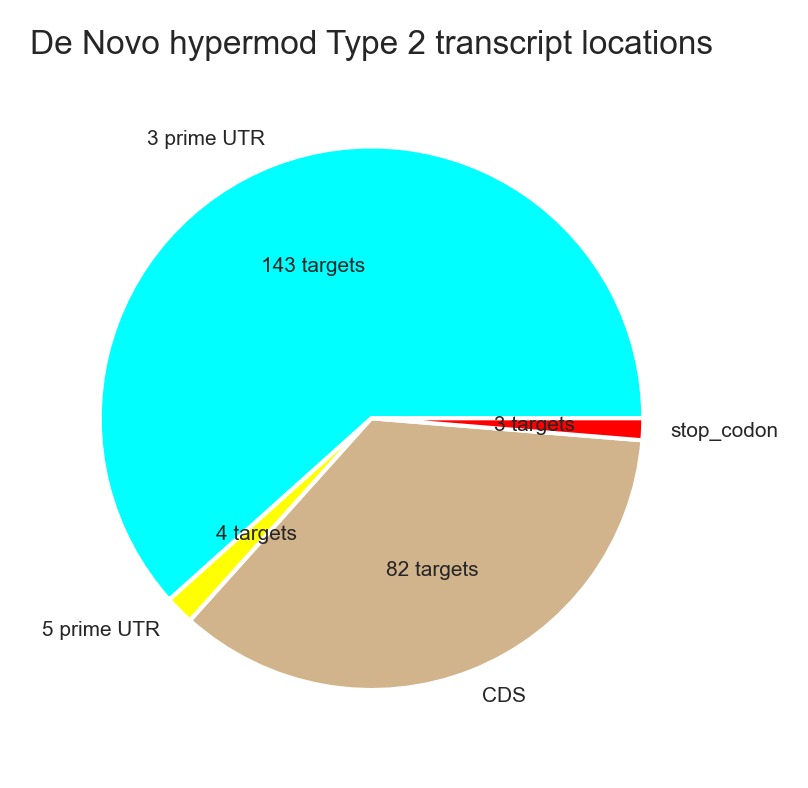

In [7]:
###Type 2###
###Pie Chart of De Novo Type 2 transcript locations###

#print(">>>>>: " + str(len(locations)))
#print(Targets)

location_dict = {"3 prime UTR":0,"5 prime UTR":0,"CDS":0, "start_codon":0, "stop_codon":0}
print(location_dict.keys())
# my_dict["Nam"].append("Guru")
# my_dict["Address"].append("Mumbai")
# my_dict["Age"].append(30
# print(my_dict)
target_Location = [loc.replace('"', '') for loc in Targets["P_location"]]
#print(target_Location)
for location, perc_diff in zip(target_Location, Targets["Percent_Diff"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    perc_diff = perc_diff.replace('[', '').replace(']', '').split(",")
    if len(location) > 1:
        for loc, pd in zip(location, perc_diff):
            loc = loc.strip()
            if loc != str(0) and loc != '':
                location_dict[loc]+=1    
print(location_dict)

labels = []
count = []

for x, y in location_dict.items():
    if y != 0:
        labels.append(x)
        count.append(y)

####Pie Charts###
plt.figure(figsize=(5, 3),dpi=300)
#autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f}
plt.pie(count, labels=labels, colors = ['cyan','yellow','tan', 'red'], autopct=lambda p:f'{p*sum(count)/100 :.0f} targets', textprops={'fontsize': 5})#,explode = (0.03,0.03,0.03,1.5,1), radius=1.2)
plt.title("De Novo hypermod Type 2 transcript locations", fontdict = {'fontsize' : 8})
# plt.savefig(save_results_to + 'Pie_hypermod_type2_0.001.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Pie_hypermod_type2_0.001.svg', transparent=True, dpi = 300)


>>>>>: 467
82
4
143


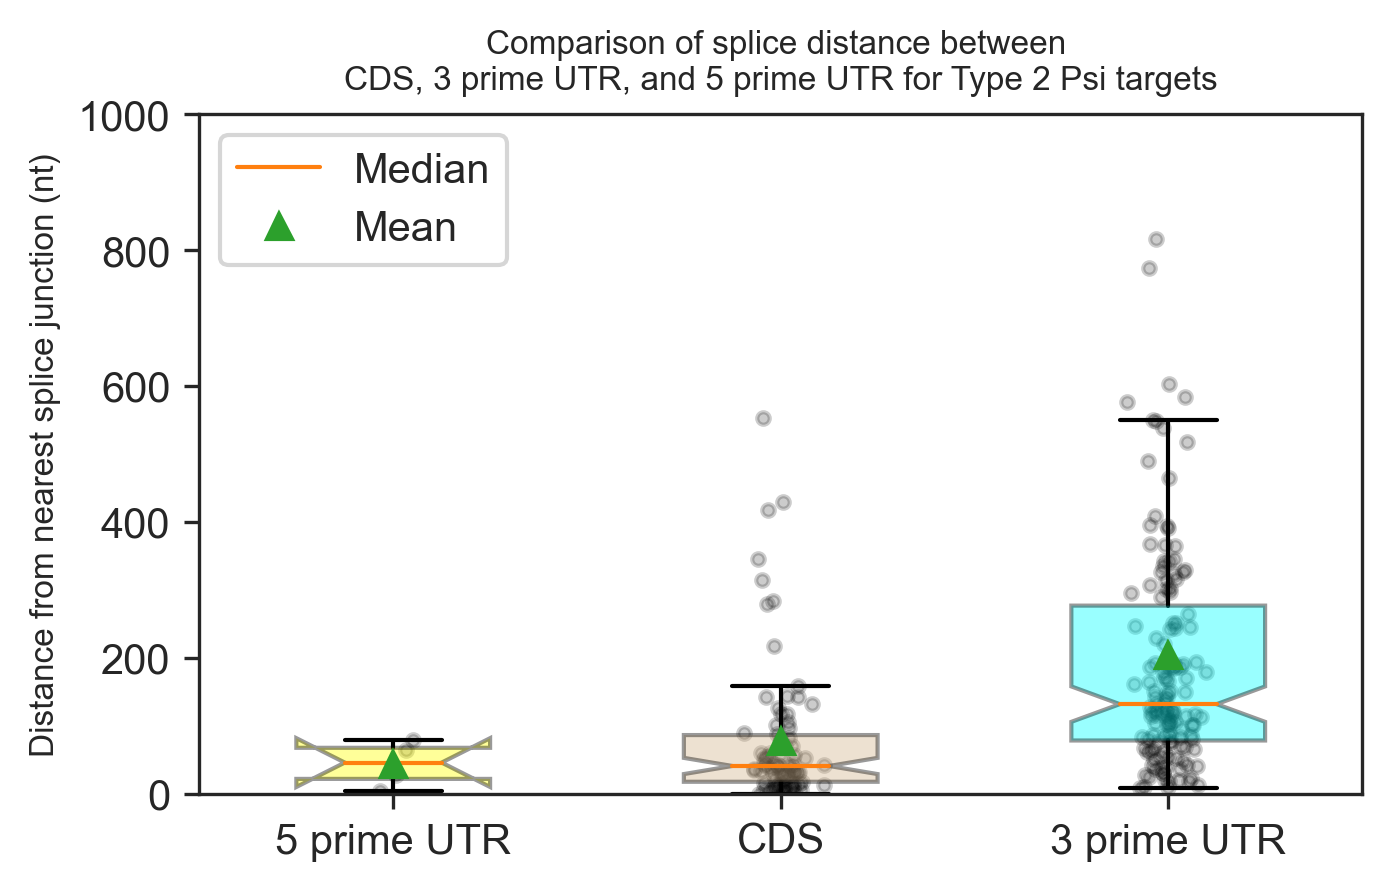

In [9]:
###Type2 Mods De Novo analysis of distance from splice junctions###
#data = pd.read_csv("Dominant_Complete_Analysis.csv")
#Targets = data[data["Transcript ID"].str.contains("ENST")==True]
print(">>>>>: " + str(len(Targets)))
#print(Targets)

target_Location = [loc.replace('"', '') for loc in Targets["P_location"]]
CDS_splice_d = []
UTR5_splice_d = []
UTR3_splice_d = []
for location, splice_distance, perc_diff in zip(target_Location,Targets["P_Splice_Distance"], Targets["Percent_Diff"]):
    location = location.replace("'", '').replace('[', '').replace(']', '').split(',')
    splice_distance = splice_distance.replace('[', '').replace(']', '').split(",")
    perc_diff = perc_diff.replace('[', '').replace(']', '').split(",")
    if len(location) > 1:
        for loc, spd, pd in zip(location, splice_distance, perc_diff):
            loc = loc.strip()
            if loc != str(0) and loc != '':
            #length_percent = round(int(spd)/int(le), 4)
            #print(loc, length_percent)
                if loc == 'CDS':
                    CDS_splice_d.append(int(spd))
                elif loc == '5 prime UTR':
                    UTR5_splice_d.append(int(spd))
                elif loc == '3 prime UTR':
                    UTR3_splice_d.append(int(spd))
print(len(CDS_splice_d))
print(len(UTR5_splice_d))
print(len(UTR3_splice_d))

plt.figure(figsize=(5, 3),dpi=300)

data = [ UTR5_splice_d, CDS_splice_d, UTR3_splice_d]#, UTRP2_Total, CDSP2_Total]
box = plt.boxplot(data, notch='False', patch_artist=True, showmeans=True, showfliers=False, widths=(0.5, 0.5, 0.5))
plt.xticks([1, 2, 3], ['5 prime UTR', 'CDS', '3 prime UTR'])#, '5 prime UTR'])
for i in [1,2,3]:
    y = data[i-1]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.2)
plt.ylabel("Distance from nearest splice junction (nt)", fontdict = {'fontsize' : 8})
plt.legend([box['medians'][0], box['means'][0]], ['Median', 'Mean'], loc = 'upper left')
#plt.yscale("log")
plt.ylim(0, 1000)
colors = ['yellow', 'tan', 'cyan']#, 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)
plt.title("Comparison of splice distance between \nCDS, 3 prime UTR, and 5 prime UTR for Type 2 Psi targets", fontdict = {'fontsize' : 8})
# plt.savefig(save_results_to + 'Boxplot_hypermod_type2.pdf', transparent=True, dpi = 300)
# plt.savefig(save_results_to + 'Boxplot_hypermod_type2.svg', transparent=True, dpi = 300)

          Gene      Transcript ID P1_location  P1_Splice_Distance  \
0         AAR2  ENST00000320849.9         UTR                 130   
1     AASDHPPT  ENST00000278618.9         CDS                   8   
2  ABCF2-H2BE1  ENST00000287844.7         UTR                 685   
3        ABHD8  ENST00000247706.4           0                   0   
4        SRP19  ENST00000505459.6           0                   0   

   Length of CDS/UTR  
0               1190  
1                121  
2               2572  
3                  0  
4                  0  
217
            Gene       Transcript ID P1_location  P1_Splice_Distance  \
0           AAR2   ENST00000320849.9         UTR                 130   
1       AASDHPPT   ENST00000278618.9         CDS                   8   
2    ABCF2-H2BE1   ENST00000287844.7         UTR                 685   
3          ABHD8   ENST00000247706.4           0                   0   
4          SRP19   ENST00000505459.6           0                   0   
..         

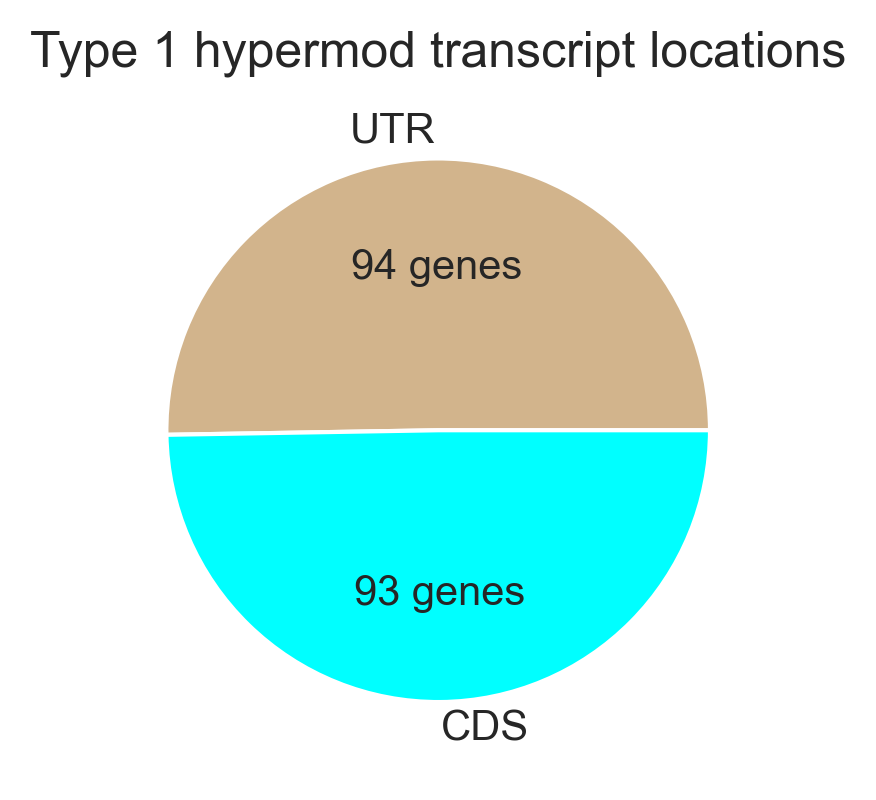

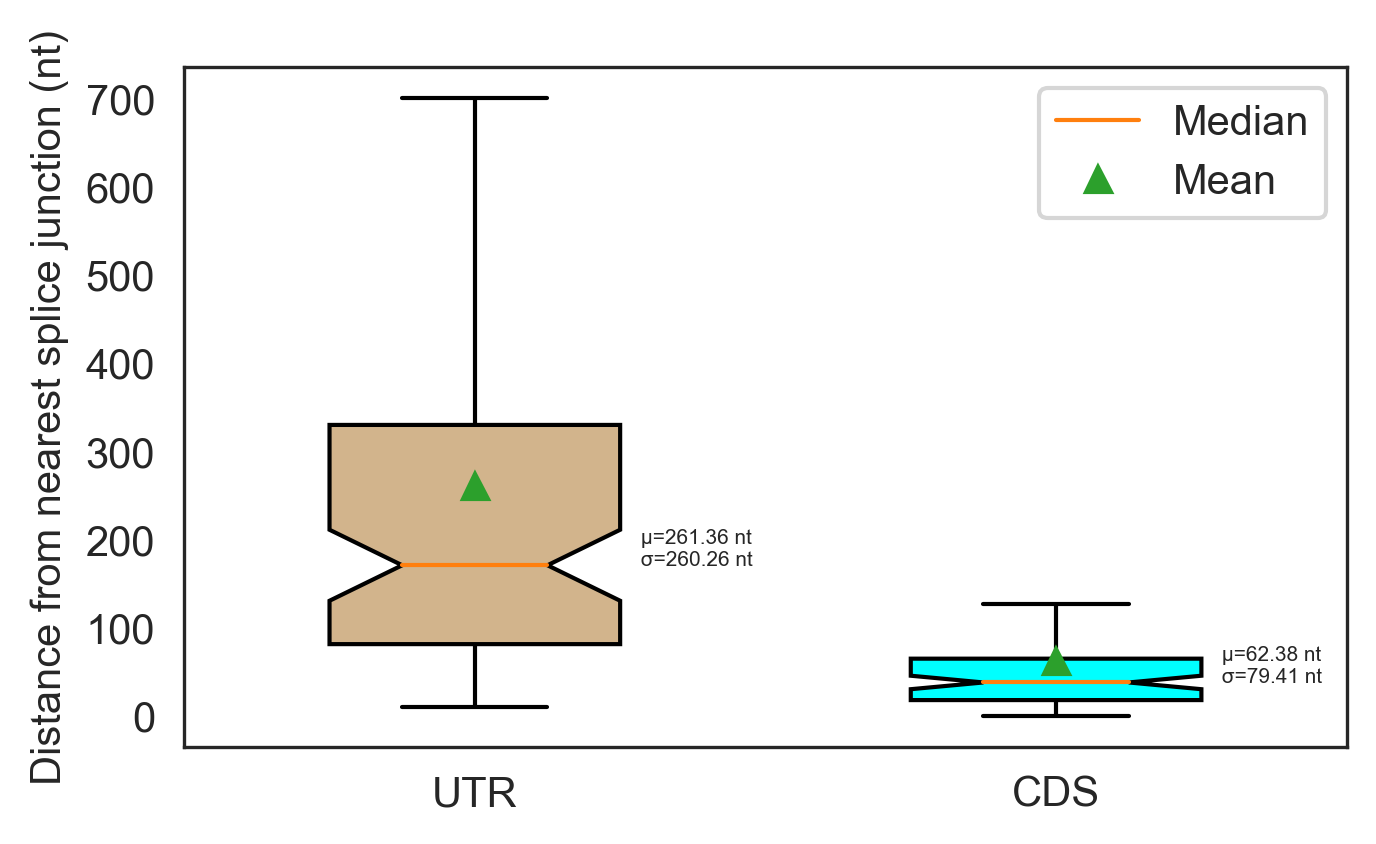

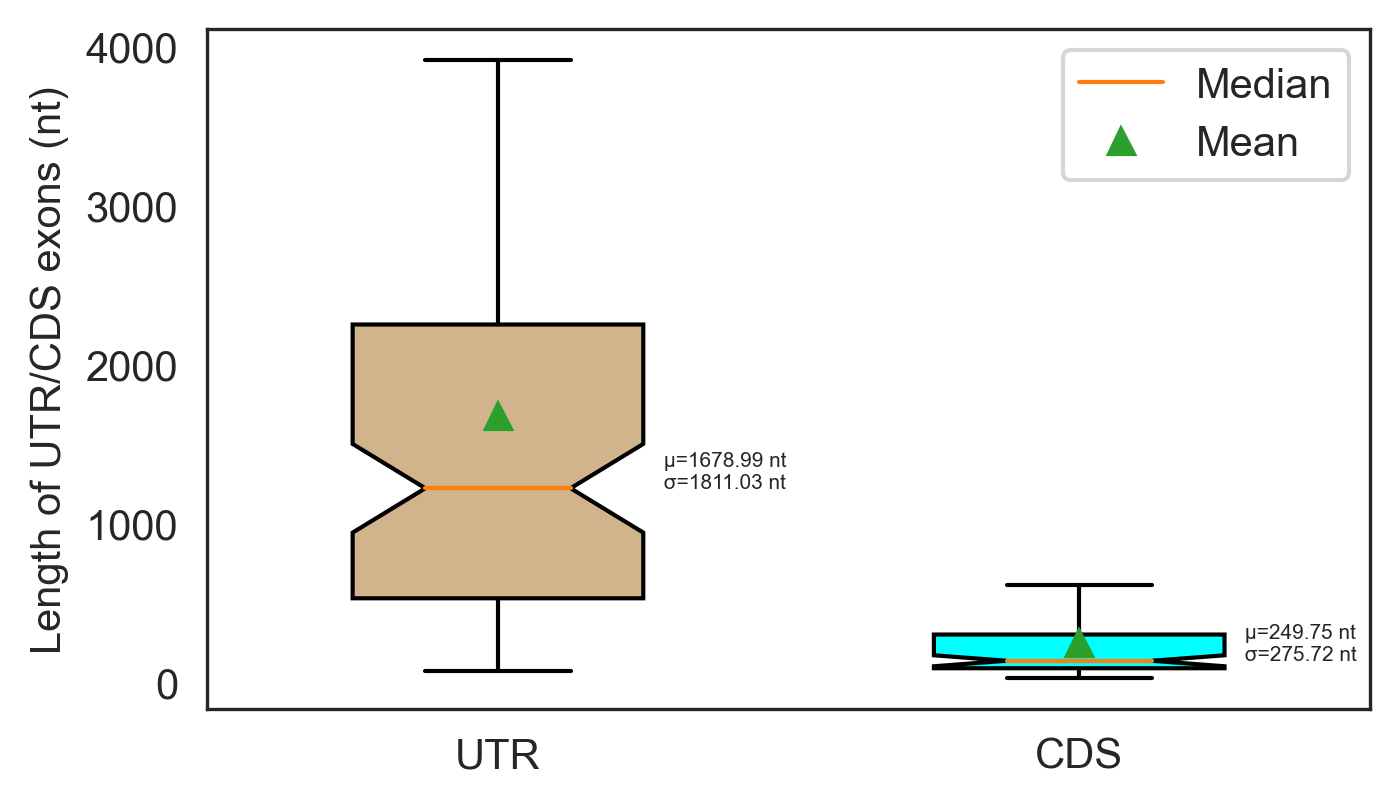

In [84]:
###Type 1 hypermods

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#data = pd.read_csv("Dom_isoforms_350.csv")
data = pd.read_csv("Dominant_v36_type1.csv", index_col=False)
print(data.head())

data = data[data["Transcript ID"].str.contains("ENST")==True]
print(len(data))
print(data)

#data.plot.pie(y="P1_location", figsize=(5, 5))
p1 = data['P1_location'].value_counts()
#p2 = data['P2_location'].value_counts()

print(p1)
#print(p2)

UTR_data_P1=data.loc[data['P1_location']=="UTR"]
UTRP1_M = UTR_data_P1['P1_Splice_Distance'].mean()
UTRP1_Std = UTR_data_P1['P1_Splice_Distance'].std()
UTRP1_Total = UTR_data_P1['P1_Splice_Distance'].values
UTRP1_Count = UTR_data_P1['P1_Splice_Distance'].count()
UTRP1_length_Total = UTR_data_P1['Length of CDS/UTR'].values
UTRP1_length_M = UTR_data_P1['Length of CDS/UTR'].mean()
UTRP1_length_Std = UTR_data_P1['Length of CDS/UTR'].std()


CDS_data_P1=data.loc[data['P1_location']=="CDS"]
CDSP1_M = CDS_data_P1['P1_Splice_Distance'].mean()
CDSP1_Std = CDS_data_P1['P1_Splice_Distance'].std()
CDSP1_Total = CDS_data_P1['P1_Splice_Distance'].values
CDSP1_Count = CDS_data_P1['P1_Splice_Distance'].count()
CDSP1_length_Total = CDS_data_P1['Length of CDS/UTR'].values
CDSP1_length_M = CDS_data_P1['Length of CDS/UTR'].mean()
CDSP1_length_Std = CDS_data_P1['Length of CDS/UTR'].std()

# UTR_data_P2=data.loc[data['P2_location']=="UTR"]
# UTRP2_M = UTR_data_P2['P2_Splice_Distance'].mean()
# UTRP2_Total = UTR_data_P2['P2_Splice_Distance'].values
# UTRP2_Count = UTR_data_P2['P2_Splice_Distance'].count()

# CDS_data_P2=data.loc[data['P2_location']=="CDS"]
# CDSP2_M = CDS_data_P2['P2_Splice_Distance'].mean()
# CDSP2_Total = CDS_data_P2['P2_Splice_Distance'].values
# CDSP2_Count = CDS_data_P2['P2_Splice_Distance'].count()

#save_results_to = 'Updated_Figures/'      
####Pie Charts###
plt.figure(figsize=(5, 3),dpi=300)
values1 = [UTRP1_Count, CDSP1_Count] 
labels = ['UTR', 'CDS']
#autopct=lambda p:f'{p:.2f}%, {p*sum(values)/100 :.0f}
plt.pie(values1, labels=labels, colors = ['tan', 'cyan'], autopct=lambda p:f'{p*sum(values1)/100 :.0f} genes')
plt.title("Type 1 hypermod transcript locations")
#plt.savefig(save_results_to + 'Pie_Type_1_v36.png', dpi = 300)


###################

###Barplot of average distance####
# y = [UTRP1_M, CDSP1_M, UTRP2_M, CDSP2_M]
# x = ["P1_UTR", "P1_CDS", "P2_UTR", "P2_CDS"]

# plt.figure(figsize=(5, 3),dpi=300)
# plt.bar(x, y, color ='black', width = 0.4)
# plt.xlabel("Transcript Location")
# plt.ylabel("Location from splice junction (bp)")
# plt.title("Average Distance from splice junction vs mRNA location")
# #plt.savefig(save_results_to + 'Avg_Distance_Bar.png', dpi = 300)

# plt.figure(figsize=(5, 3),dpi=300)
# plt.hist(UTRP1_Total, density=False, bins=30) 
# plt.hist(CDSP1_Total, density=False, bins=10)  
# plt.ylabel('Probability')
# plt.xlabel('Distance from Splice Junction (bp)')
#################

###Histogram of distance from splice junctions####
# import seaborn as sns
# sns.set_style(style='white')
# plt.figure(figsize=(5, 3),dpi=300)
# sns.distplot(UTRP1_Total, rug=False, hist = True, kde = False, 
#                  hist_kws = {'edgecolor': 'black'},  
#                  kde_kws = {'shade': True, 'linewidth': 3}, label = 'Position 1 UTR sites')
# sns.distplot(CDSP1_Total, rug=False, hist = True, kde = False, 
#                  hist_kws = {'edgecolor': 'black'},
#                  kde_kws = {'shade': True, 'linewidth': 3}, label = 'Position 1 CDS sites')
# plt.legend()
# plt.xlabel("Distance from splice junction (bp)")
# plt.ylabel("Count")
# plt.title("Distance from splice junction in Position 1 sites")
# #plt.savefig(save_results_to + 'Distance_hist_Pos1.png', dpi = 300)


plt.figure(figsize=(5, 3),dpi=300)
data = [UTRP1_Total, CDSP1_Total]#, UTRP2_Total, CDSP2_Total]
box = plt.boxplot(data, notch='False', patch_artist=True, showmeans=True, showfliers=False, widths=(0.5, 0.5))
plt.xticks([1, 2], ['UTR', 'CDS'])
plt.ylabel("Distance from nearest splice junction (nt)")
plt.legend([box['medians'][0], box['means'][0]], ['Median', 'Mean'])
colors = ['tan', 'cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

m1 = [UTRP1_M, CDSP1_M]
st1 = [UTRP1_Std, CDSP1_Std]
for i, line in enumerate(box['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f} nt\n σ={:.2f} nt'.format(m1[i], st1[i])
    plt.annotate(text, xy=(x+0.15, y+0.2), fontsize=5)
#plt.savefig(save_results_to + 'Splice_Distance_Type_1_v36.png', dpi = 300)

plt.figure(figsize=(5, 3),dpi=300)
data = [UTRP1_length_Total, CDSP1_length_Total]#, UTRP2_Total, CDSP2_Total]
box = plt.boxplot(data, notch='False', patch_artist=True, showmeans=True, showfliers=False, widths=(0.5, 0.5))
plt.xticks([1, 2], ['UTR', 'CDS'])
plt.ylabel("Length of UTR/CDS exons (nt)")
plt.legend([box['medians'][0], box['means'][0]], ['Median', 'Mean'])
colors = ['tan', 'cyan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
#for i in data[0]:
    #y = i
    #x = np.random.normal(1, 0.02, len(y))
    #x = np.random.normal(i, 0.02, len(y))
    #plt.plot(1,y,'.', color='k', alpha=0.66)

m1 = [UTRP1_length_M, CDSP1_length_M]
st1 = [UTRP1_length_Std, CDSP1_length_Std]
for i, line in enumerate(box['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f} nt\n σ={:.2f} nt'.format(m1[i], st1[i])
    plt.annotate(text, xy=(x+0.15, y+0.2), fontsize=5)
#plt.savefig(save_results_to + 'Exon_Length_Type_1_v36.png', dpi = 300)